In [2]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
data_file = 'data/driving_log.csv'
data_frame = pd.read_csv(data_file)
print(data_frame.shape)
display(data_frame.head())

(8036, 7)


,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


In [3]:
display(data_frame.describe())

,steering,throttle,brake,speed
count,8036.000000,8036.000000,8036.000000,8036.000000
mean,0.004070,0.869660,0.001970,28.169839
std,0.128840,0.301326,0.036565,6.149327
min,-0.942695,0.000000,0.000000,0.502490
25%,0.000000,0.985533,0.000000,30.183093
50%,0.000000,0.985533,0.000000,30.186400
75%,0.000000,0.985533,0.000000,30.186640
max,1.000000,0.985533,1.000000,30.709360


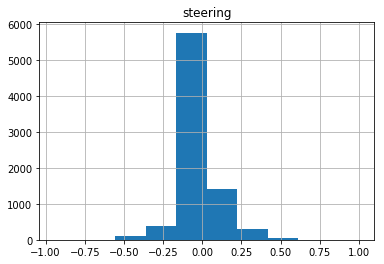

In [9]:
data_frame.hist(column='steering')
plt.show()

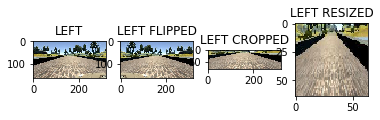

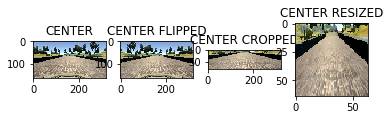

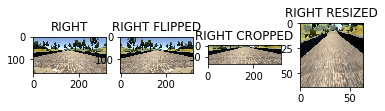

In [46]:
from PIL import Image

def FlipImage(image):
    flipped_image = image.transpose(Image.FLIP_LEFT_RIGHT)
    return flipped_image
    
def CropImage(image):
    # http://matthiaseisen.com/pp/patterns/p0202/
    width = image.width 
    height = image.height
    # cut out sky, trees , and car
    cropped_image = image.crop((0, int(height/3), 320, height-25)) # (left, upper, right, and lower) 
    return cropped_image

def ResizeImage(image):
    resize_image = image.resize((64,64))
    return resize_image

left_image = Image.open('data/IMG/left_2016_12_01_13_30_48_287.jpg')
center_image = Image.open('data/IMG/center_2016_12_01_13_30_48_287.jpg')
right_image = Image.open('data/IMG/right_2016_12_01_13_30_48_287.jpg')

images = [left_image, center_image, right_image]
image_names = ['LEFT', 'CENTER', 'RIGHT']

i = 1

for image, names in zip(images, image_names):
    flipped_image = FlipImage(image)
    cropped_image = CropImage(flipped_image)
    resize_image = ResizeImage(cropped_image)
    plt.subplot(i, 4, 1)
    plt.imshow(image)
    plt.title('{}'.format(image_names[i-1]))
    plt.subplot(i, 4, 2)
    plt.imshow(flipped_image)
    plt.title('{} FLIPPED'.format(image_names[i-1]))
    plt.subplot(i, 4, 3)
    plt.imshow(cropped_image)
    plt.title('{} CROPPED'.format(image_names[i-1]))
    plt.subplot(i, 4, 4)
    plt.imshow(resize_image)
    plt.title('{} RESIZED'.format(image_names[i-1]))
    plt.show()
    i = i + 1


In [68]:
from sklearn.model_selection import train_test_split
images = data_frame['center']
angles = data_frame['steering']
images_train, images_validation, angles_train, angles_validation = train_test_split(
    images, angles, test_size=0.15, random_state=42)
#display(images_train.head())
#display(angles_train.head())
images_train.head(), angles_train.head()

(1188    IMG/center_2016_12_01_13_34_38_663.jpg
 5418    IMG/center_2016_12_01_13_42_16_322.jpg
 447     IMG/center_2016_12_01_13_33_23_530.jpg
 1417    IMG/center_2016_12_01_13_35_01_853.jpg
 2582    IMG/center_2016_12_01_13_36_59_991.jpg
 Name: center, dtype: object, 1188    0.090465
 5418    0.000000
 447     0.000000
 1417    0.000000
 2582    0.000000
 Name: steering, dtype: float64)

In [58]:
import keras
from keras.models import *
from keras.layers import *
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(3, 1, 1, input_shape=(90, 320, 3)))
model.add(ELU())
model.add(Dropout(0.5))
model.add(Conv2D(3, 5, 5, subsample=(2, 2)))
model.add(ELU())
model.add(Dropout(0.5))
model.add(Conv2D(24, 5, 5, subsample=(2, 2)))
model.add(ELU())
model.add(Dropout(0.5))
model.add(Conv2D(36, 5, 5, subsample=(2, 2)))
model.add(ELU())
model.add(Dropout(0.5))
model.add(Conv2D(48, 3, 3))
model.add(ELU())
model.add(Dropout(0.5))
model.add(Conv2D(64, 3, 3))
model.add(ELU())
model.add(Dropout(0.5))
model.add(Conv2D(128, 3, 3))
model.add(ELU())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(100))
model.add(ELU())
model.add(Dropout(0.5))
model.add(Dense(50))
model.add(ELU())
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(ELU())
model.add(Dropout(0.5))
model.add(Dense(1))

optimizer = Adam(lr=0.001)
model.compile(loss='mse', optimizer=optimizer)
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_8 (Convolution2D)  (None, 90, 320, 3)    12          convolution2d_input_2[0][0]      
____________________________________________________________________________________________________
elu_11 (ELU)                     (None, 90, 320, 3)    0           convolution2d_8[0][0]            
____________________________________________________________________________________________________
dropout_11 (Dropout)             (None, 90, 320, 3)    0           elu_11[0][0]                     
____________________________________________________________________________________________________
convolution2d_9 (Convolution2D)  (None, 43, 158, 3)    228         dropout_11[0][0]                 
___________________________________________________________________________________________